<a href="https://colab.research.google.com/github/VeerViswajit/DL-basic-NN-implementation/blob/main/NN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [79]:
data= pd.read_csv("Crop_Recommendation.csv")
data.head(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,Rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,Rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,Rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,Rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,Rice


In [12]:
X=data.iloc[:,0:-1].values
y=data.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

y = lbe.fit_transform(y)
class_mapping = {label: idx for idx, label in enumerate(lbe.classes_)}

print("Label Encoding:")
print("Classes and their encoded values:", class_mapping)


Label Encoding:
Classes and their encoded values: {'Apple': 0, 'Banana': 1, 'Blackgram': 2, 'ChickPea': 3, 'Coconut': 4, 'Coffee': 5, 'Cotton': 6, 'Grapes': 7, 'Jute': 8, 'KidneyBeans': 9, 'Lentil': 10, 'Maize': 11, 'Mango': 12, 'MothBeans': 13, 'MungBean': 14, 'Muskmelon': 15, 'Orange': 16, 'Papaya': 17, 'PigeonPeas': 18, 'Pomegranate': 19, 'Rice': 20, 'Watermelon': 21}


In [76]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
X_scaled = scl.fit_transform(X)
y_scaled = scl.fit_transform(y.reshape(-1,1)).flatten()
y_scaled.reshape(y.shape[0])
# y_scaled
# X_scaled[0:10]
# X_scaled[0].T
# # x=5
# # y[4:4+x]
# w1=np.ones(shape=X.shape[1])
# np.dot(w1,X_scaled[0:5].T)
# X_scaled[0:2].T


array([0.95238095, 0.95238095, 0.95238095, ..., 0.23809524, 0.23809524,
       0.23809524])

In [77]:
import random
# random_indices = np.random.permutation(X.shape[0])
# print(len(random_indices))
def mini_batch_gradient_descent(X,y,epochs,learning_rate=0.01,batch_size=5):
  n = X.shape[1]
  w = np.ones(shape=n)
  b = 0
  cost_list=[]
  epoch_list=[]
  n1=X.shape[0]
  if batch_size > n1: # In this case mini batch becomes same as batch gradient descent
    batch_size = n1
  for i in range(epochs):
    rand_index = random.randint(0,X.shape[0]-batch_size-1)
    Xtmp = X[rand_index : rand_index + batch_size]
    ytmp = y[rand_index : rand_index + batch_size]
    y_pred = np.dot(w, Xtmp.T) + b

    w_grad = -(2/len(Xtmp))*(Xtmp.T.dot(ytmp-y_pred))
    b_grad = -(2/len(Xtmp))*np.sum(ytmp-y_pred)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(ytmp-y_pred)) # MSE (Mean Squared Error)

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(X_scaled,y_scaled,2200,learning_rate=0.01,batch_size=5)

w,b,cost

(array([-0.05268076, -0.24390331, -0.15465768,  0.54414117,  0.27134315,
         0.57934344,  0.28211437]),
 -0.13900270611466442,
 0.36178034192190145)

Text(0, 0.5, 'cost')

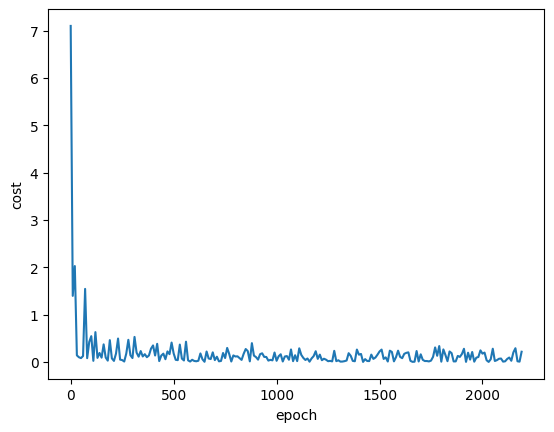

In [78]:
plt.plot(epoch_list,cost_list)
plt.xlabel("epoch")
plt.ylabel("cost")